<a href="https://colab.research.google.com/github/JimmyChavada/Machine-Learning-Concepts/blob/main/ML_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This project outlines the various supervised learning techniques used on a dataset of

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym"
, "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# read in the data and change the names of the columns
df = pd.read_csv("magic04.data", names=cols)
print(df.head())


    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [ ]:
# class of g or h for gamma and hadron, if column = g then 1, else 0
df["class"]= (df["class"] == "g").astype(int)



In [ ]:
df.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

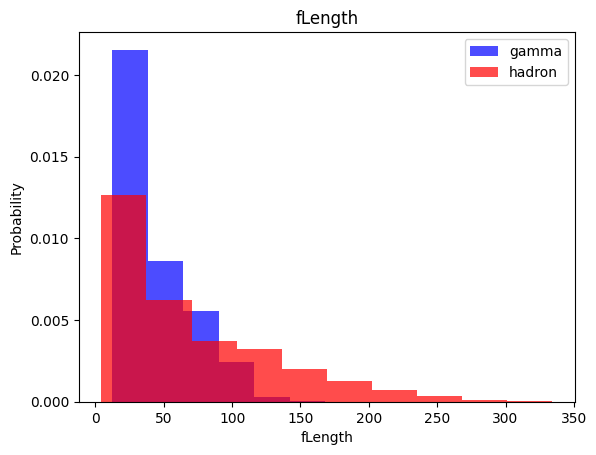

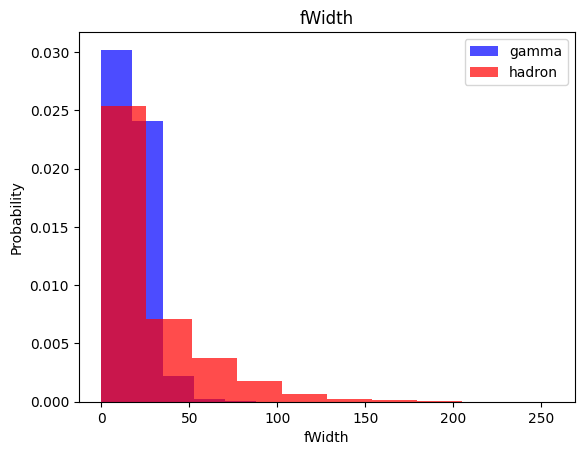

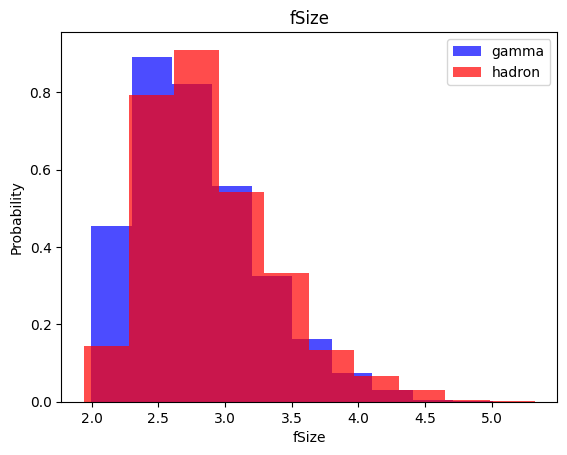

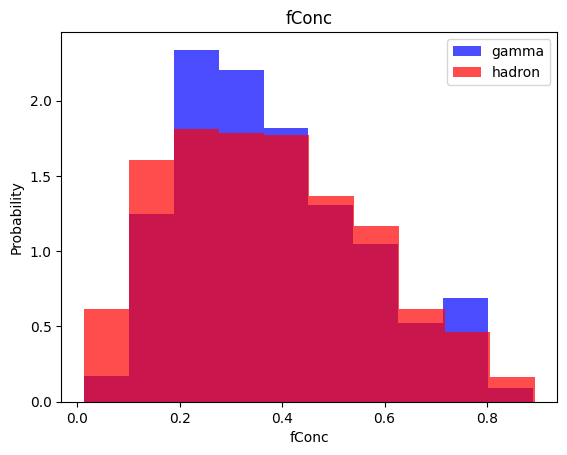

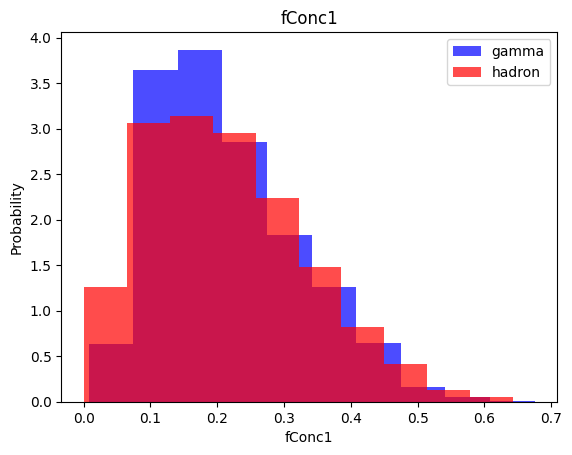

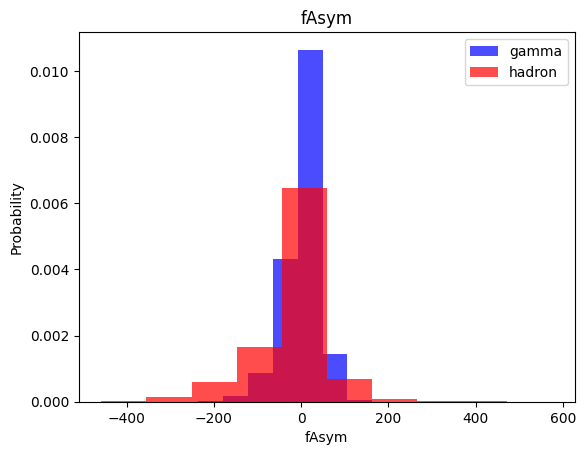

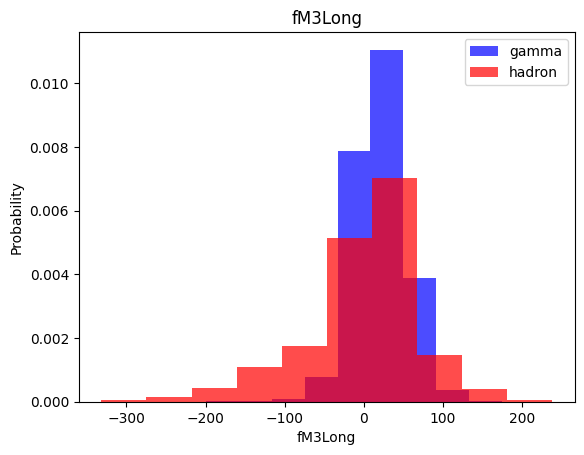

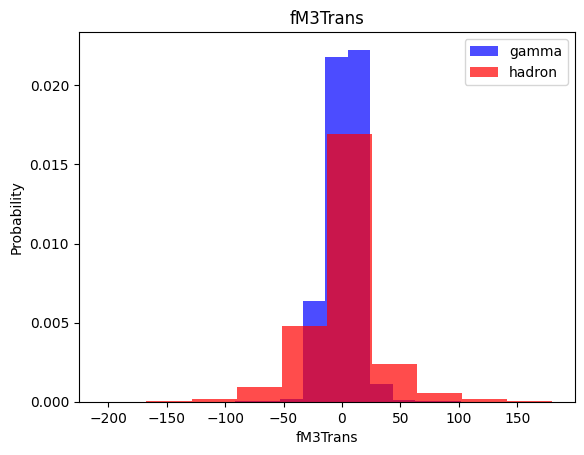

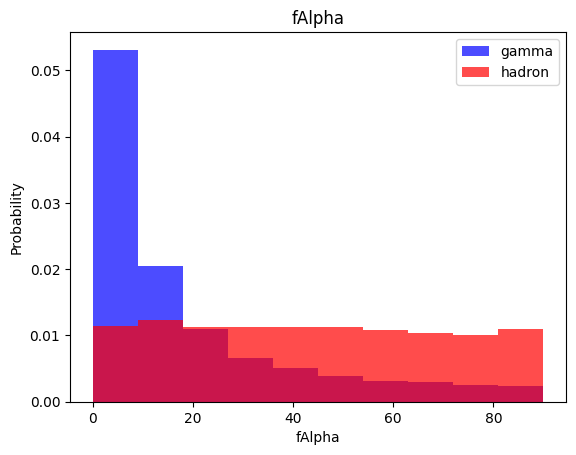

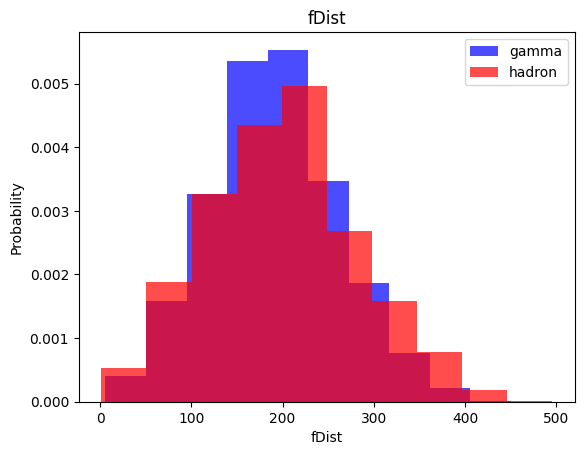

In [ ]:
# go through all the labels of all the features till the class
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = 'blue', label='gamma', alpha=0.7, density = True) # get everything class = 1, and the values for the specific label
  plt.hist(df[df["class"] == 0][label], color = 'red', label='hadron', alpha=0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Create the train, validation, and test dataset

# split at 60%, cut the data off for training data, then between 60 - 80 will go towards validation, the rest is test data
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # split the dataframe, and sample/shuffle the data


# some of the data will be at 100 or 0.3, this affects the results, so we must scale
# the data so that its relative to the mean and the STD

In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # import standard scaler from sklearn
  scaler = StandardScaler() # fit and transform x
  x = scaler.fit_transform(x) # take x and fit standard scaler and this our new x


  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)
    # take the less class and keep sampling to increase size of data set to match

  data = np.hstack((x, np.reshape(y, (-1, 1)))) # take array and another array and horizontally stack, size by side

  return data, x, y

In [ ]:
# from the training data set where the class is 1 and 0, we get more gamma than hadron
# this is issue, instead we want to oversample the training dataset
# increase number of hadron values so they match

train, x_train, y_train= scale_dataset(train, oversample = True)

# switch to false, because valid and test: for data we havent seen yet we dont wanna balance those
# we need to trust the model and not over sample
valid, x_valid, y_valid= scale_dataset(valid, oversample = False)
test, x_test, y_test= scale_dataset(test, oversample = False)

Data is now formatted

KNN:



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

# print out a classification report to give us a report on our prediction
# precision, out of all the ones labeled aas true positive did we actually get right
# out of all the ones we labeled the specific class is the actual class
# recall is how many relevant items are retrieved, out of all the ones we know are positive how many did we get right
# f1 score is combination of precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1351
           1       0.86      0.86      0.86      2453

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1351
           1       0.74      0.91      0.81      2453

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1351
           1       0.85      0.82      0.84      2453

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



SVM


In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_model = SVC() # there are alot of params within this for production level applications
svm_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1351
           1       0.85      0.82      0.84      2453

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



Neural network


In [ ]:
#using for classification
import tensorflow as tf


In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('accuracy')
  ax2.grid(True)
  plt.show()


In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu' ),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid' )
  ]) # layer the things passed in as seperate layers

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [ ]:
# train the model
# keep track of history of training
# history = nn_model.fit(
#     x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
#   )

In [ ]:
# plot the loss, validation loss and accuracy performs worse than training loss and accuracy
# validatino is stuff that it hasnt seen yet
# plot_loss(history)
# plot_accuracy(history)

16, nodes, dropout 0, lr 0.01, batch size 32


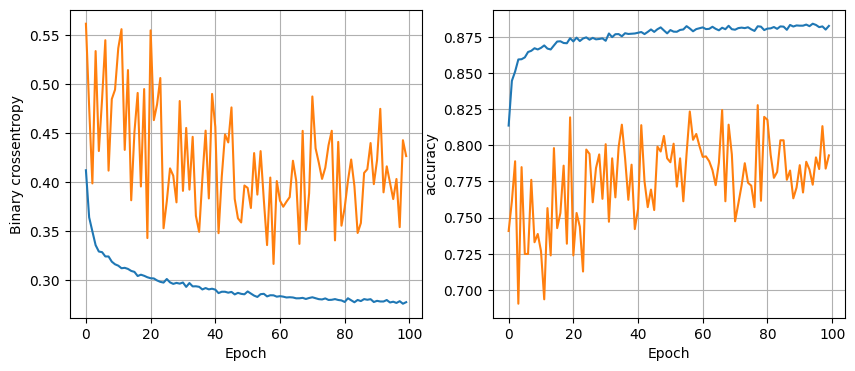

119/119 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8699
16, nodes, dropout 0, lr 0.01, batch size 64


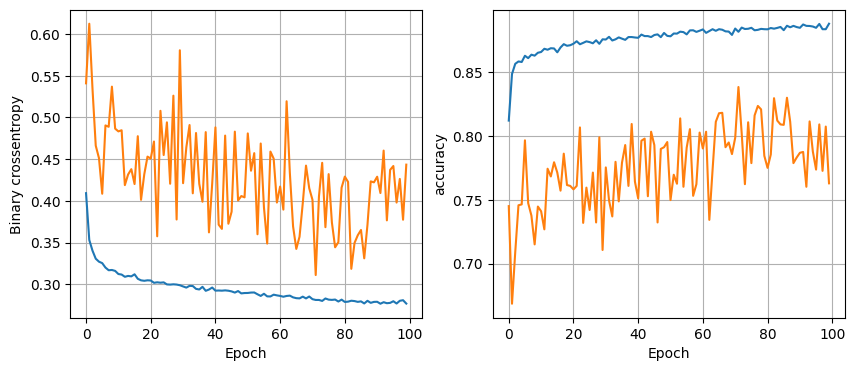

119/119 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8701
16, nodes, dropout 0, lr 0.01, batch size 128


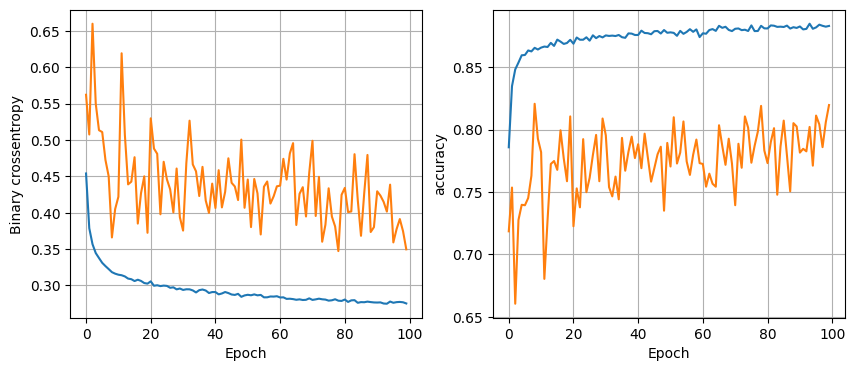

119/119 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8654
16, nodes, dropout 0, lr 0.005, batch size 32


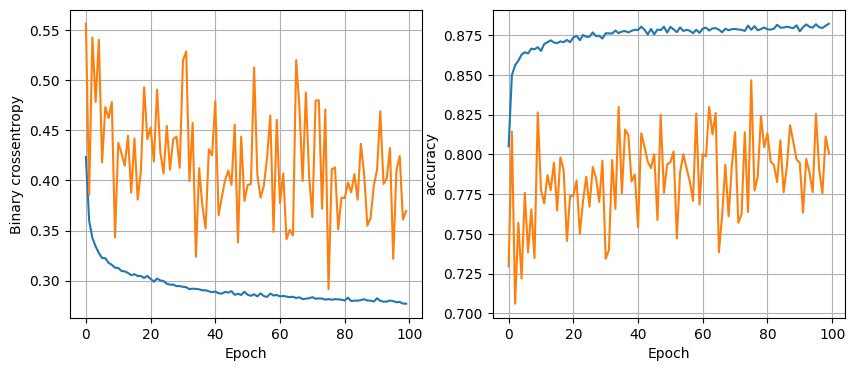

119/119 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8665
16, nodes, dropout 0, lr 0.005, batch size 64


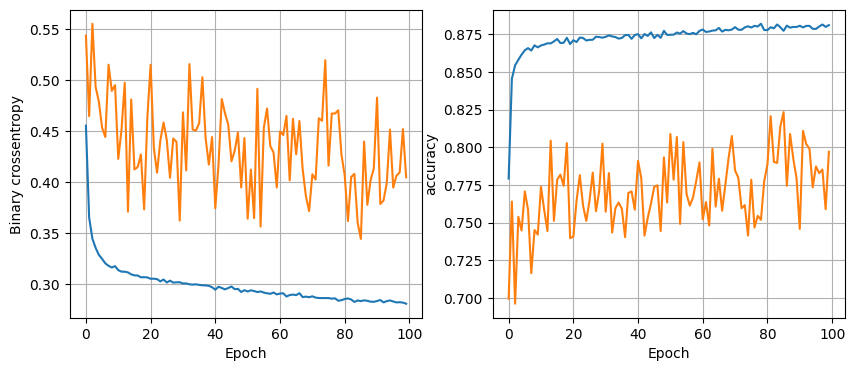

119/119 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8712
16, nodes, dropout 0, lr 0.005, batch size 128


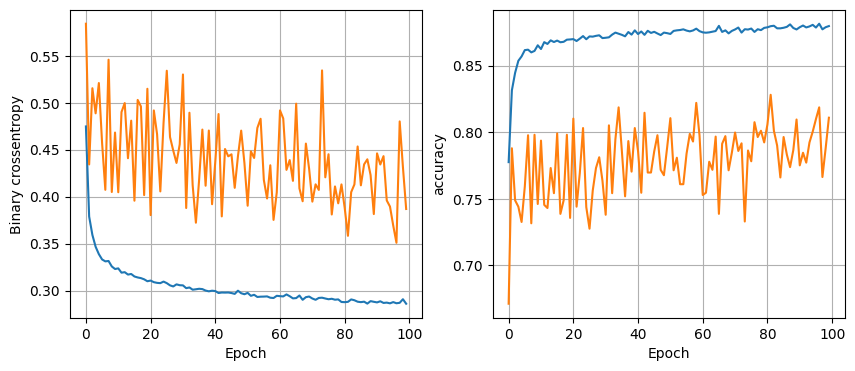

119/119 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8672
16, nodes, dropout 0, lr 0.001, batch size 32


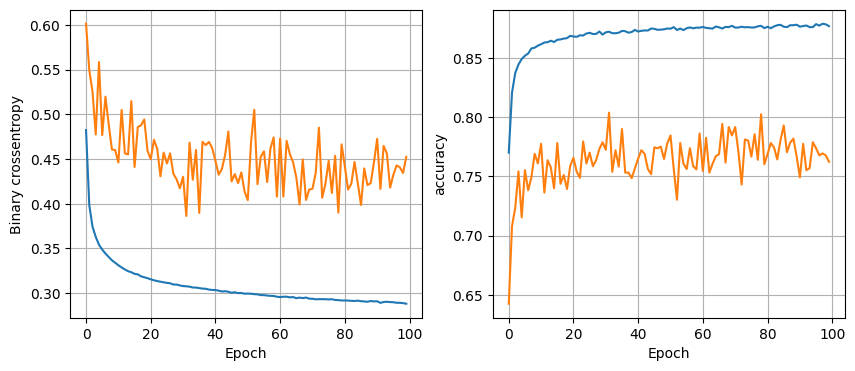

119/119 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8693
16, nodes, dropout 0, lr 0.001, batch size 64


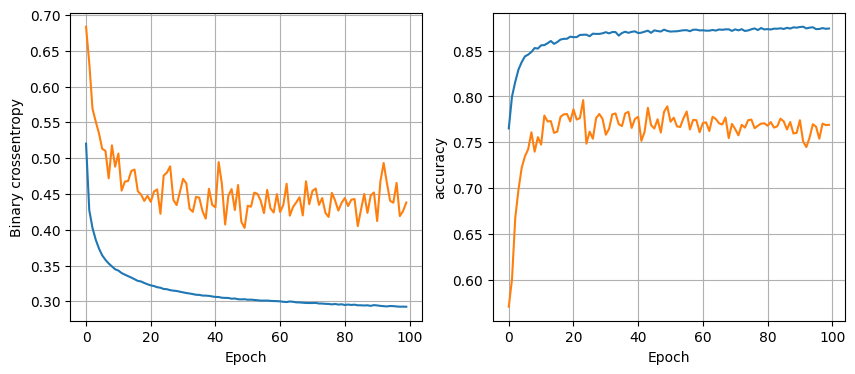

119/119 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8686
16, nodes, dropout 0, lr 0.001, batch size 128


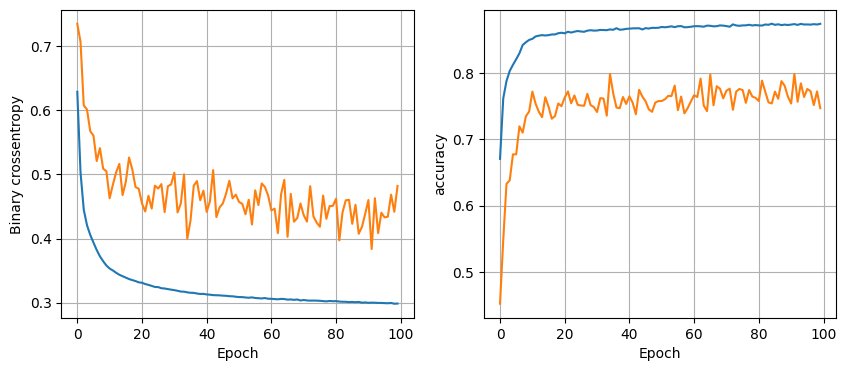

119/119 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8712
16, nodes, dropout 0.2, lr 0.01, batch size 32


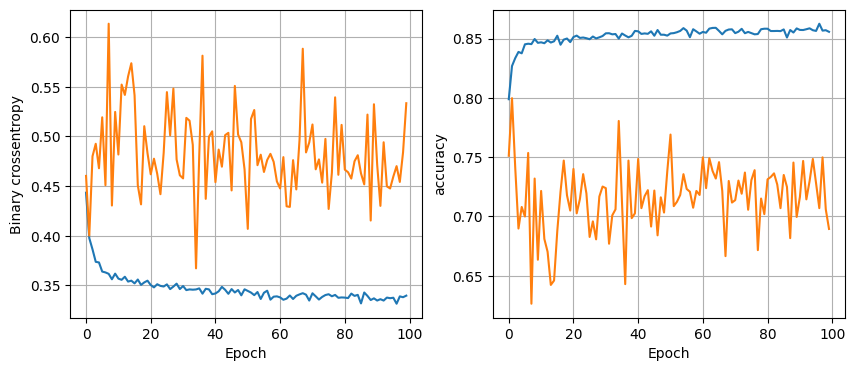

119/119 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8641
16, nodes, dropout 0.2, lr 0.01, batch size 64


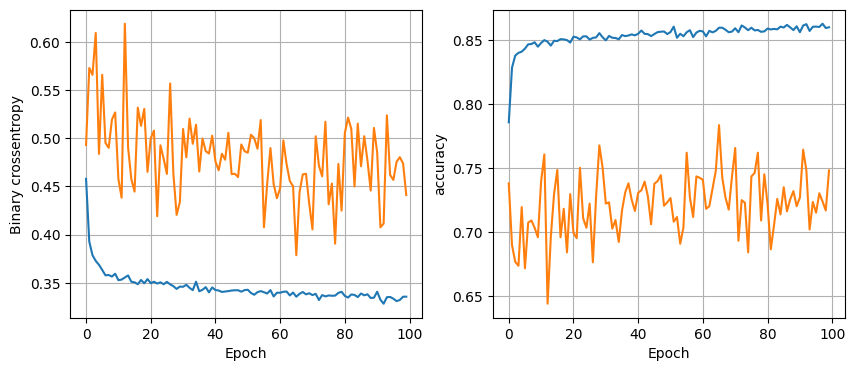

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8688
16, nodes, dropout 0.2, lr 0.01, batch size 128


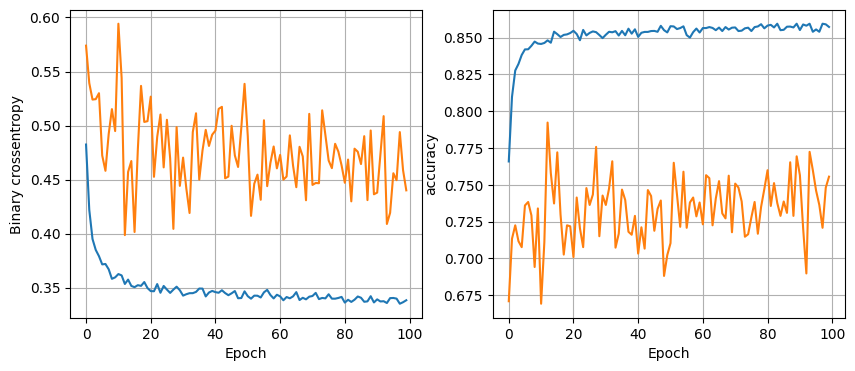

119/119 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8672
16, nodes, dropout 0.2, lr 0.005, batch size 32


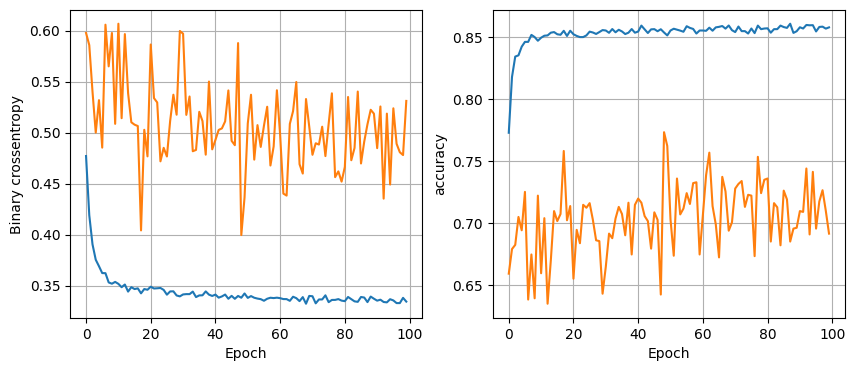

119/119 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8651
16, nodes, dropout 0.2, lr 0.005, batch size 64


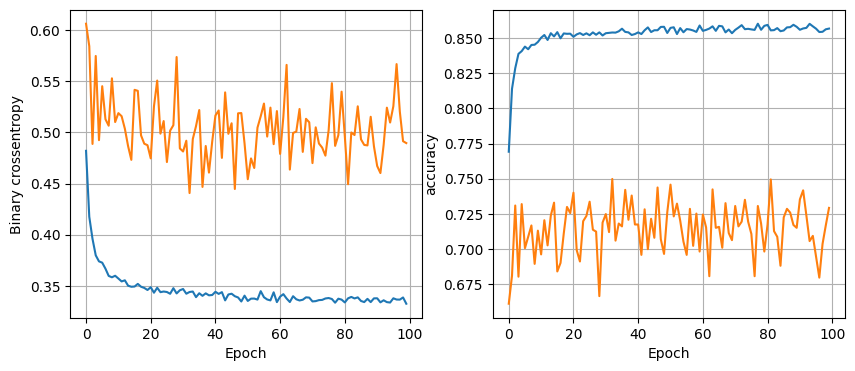

119/119 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8628
16, nodes, dropout 0.2, lr 0.005, batch size 128


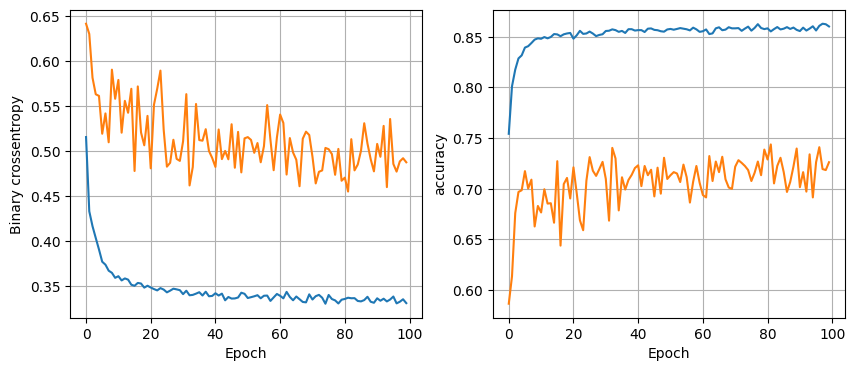

119/119 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8646
16, nodes, dropout 0.2, lr 0.001, batch size 32


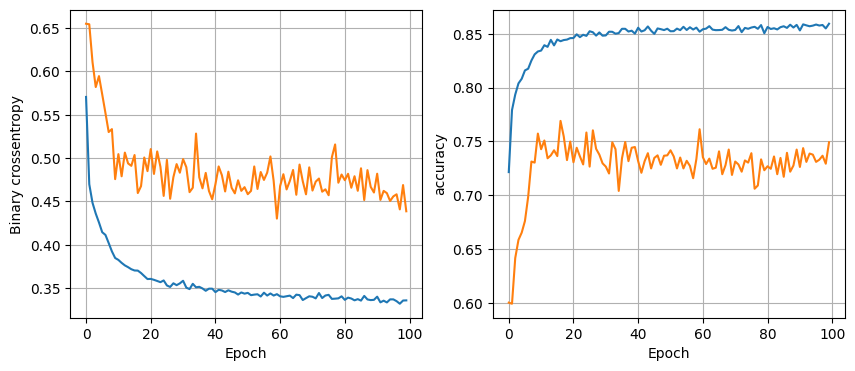

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8680
16, nodes, dropout 0.2, lr 0.001, batch size 64


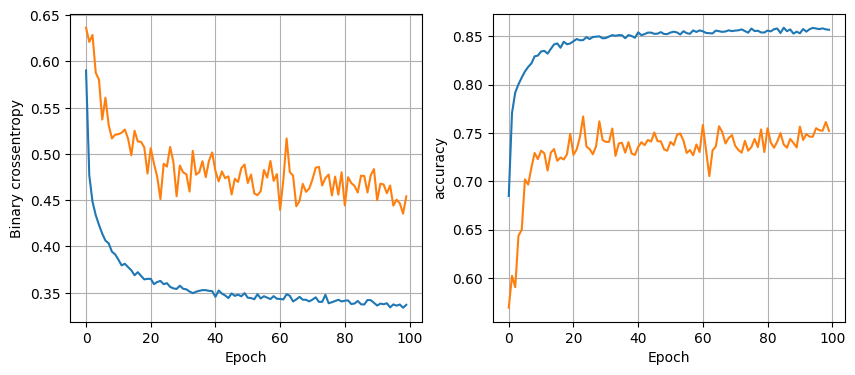

119/119 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8725
16, nodes, dropout 0.2, lr 0.001, batch size 128


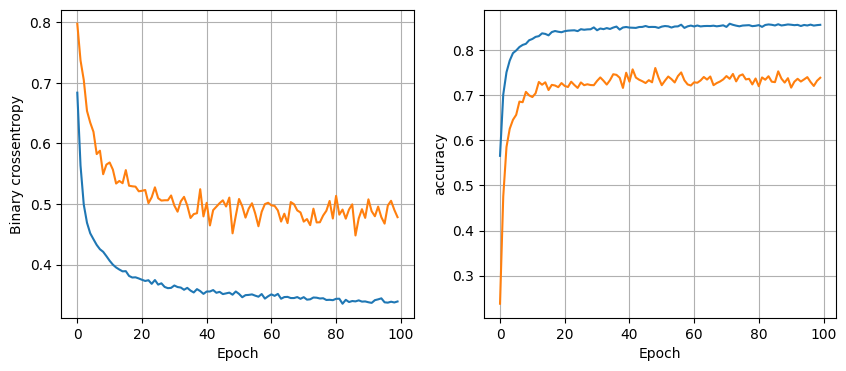

119/119 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8693
32, nodes, dropout 0, lr 0.01, batch size 32


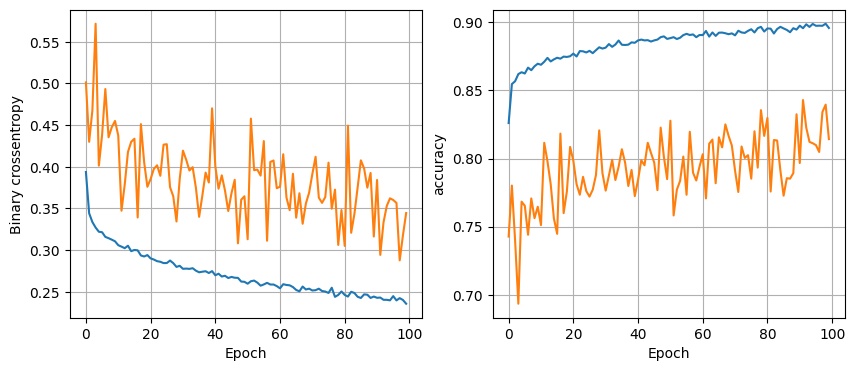

119/119 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8680
32, nodes, dropout 0, lr 0.01, batch size 64


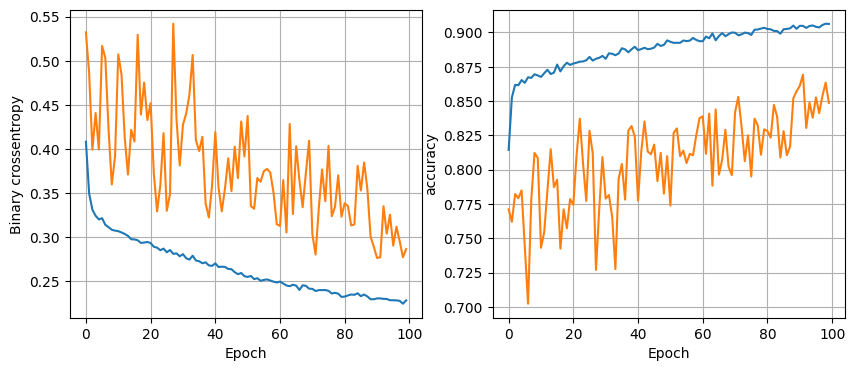

119/119 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8620
32, nodes, dropout 0, lr 0.01, batch size 128


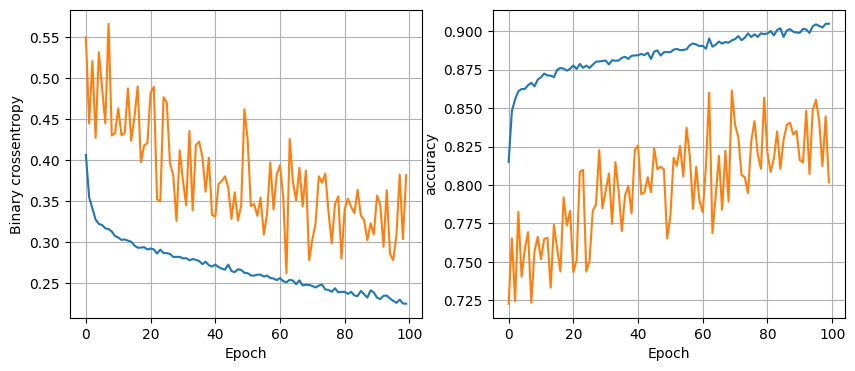

119/119 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8659
32, nodes, dropout 0, lr 0.005, batch size 32


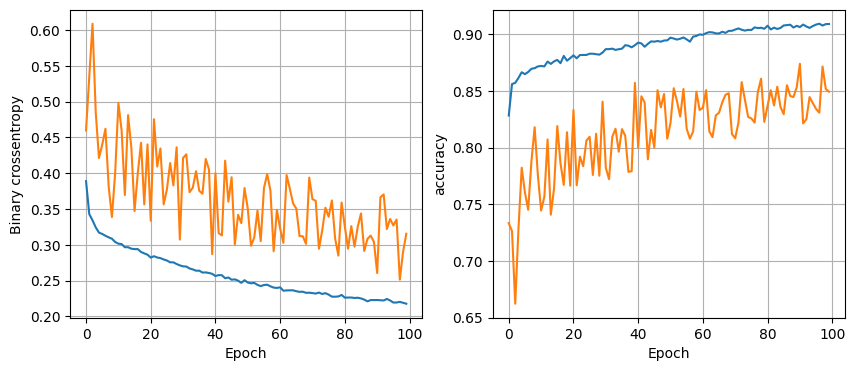

119/119 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8588
32, nodes, dropout 0, lr 0.005, batch size 64


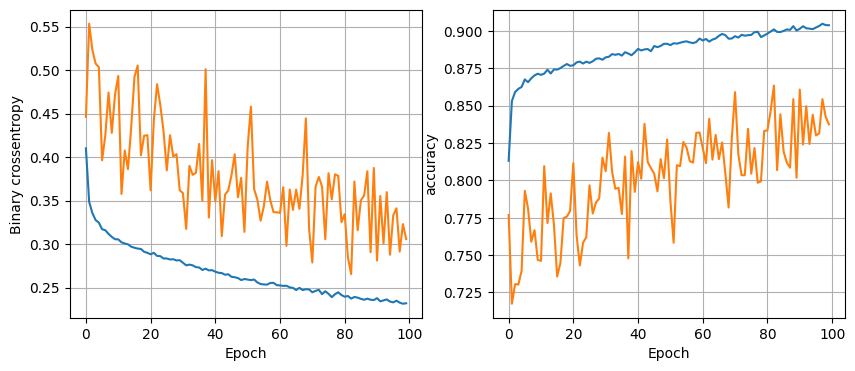

119/119 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8638
32, nodes, dropout 0, lr 0.005, batch size 128


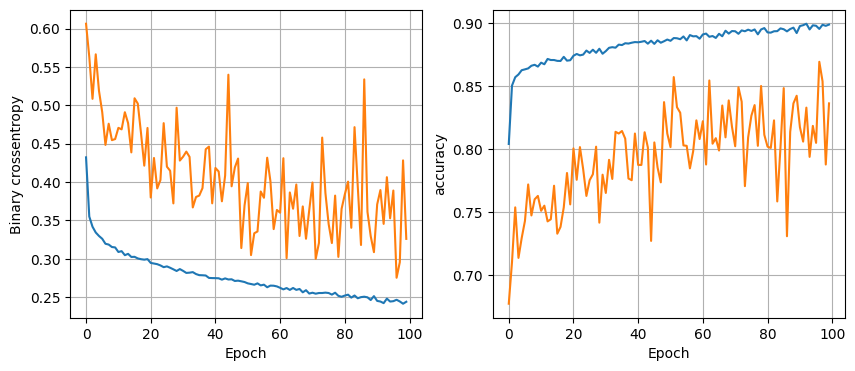

119/119 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8601
32, nodes, dropout 0, lr 0.001, batch size 32


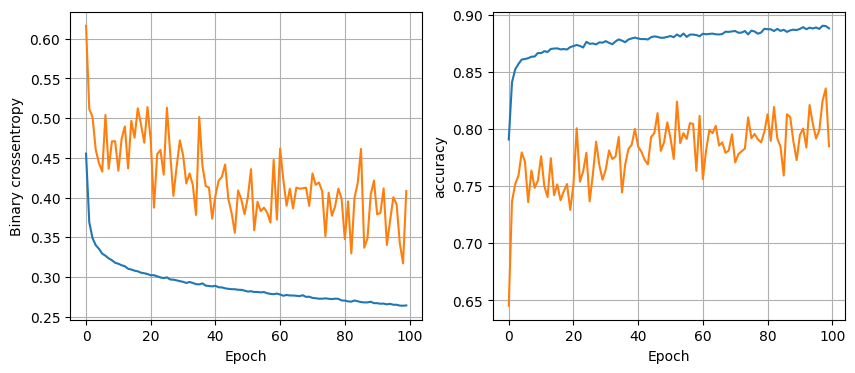

119/119 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8725
32, nodes, dropout 0, lr 0.001, batch size 64


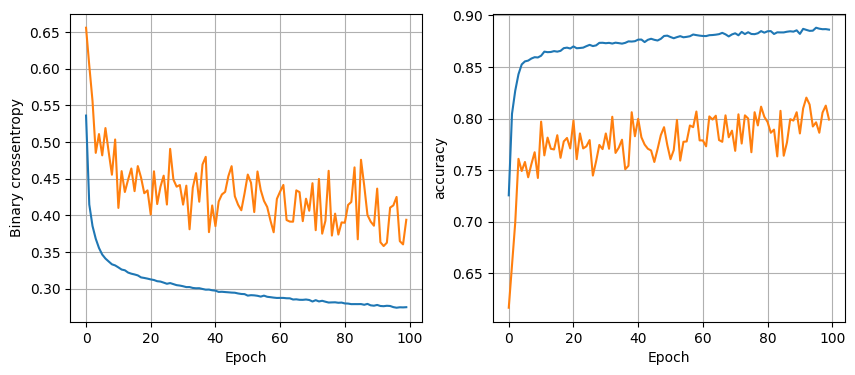

119/119 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8728
32, nodes, dropout 0, lr 0.001, batch size 128


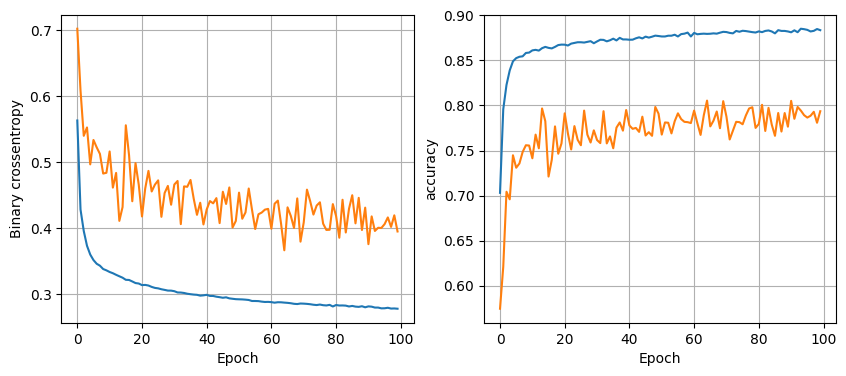

119/119 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8707
32, nodes, dropout 0.2, lr 0.01, batch size 32


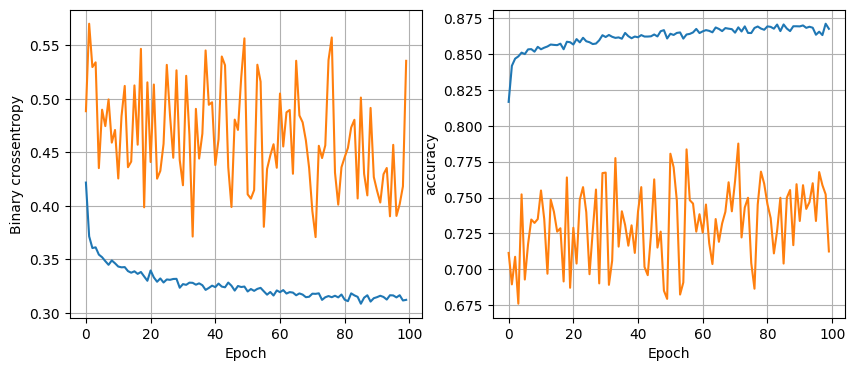

119/119 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8638
32, nodes, dropout 0.2, lr 0.01, batch size 64


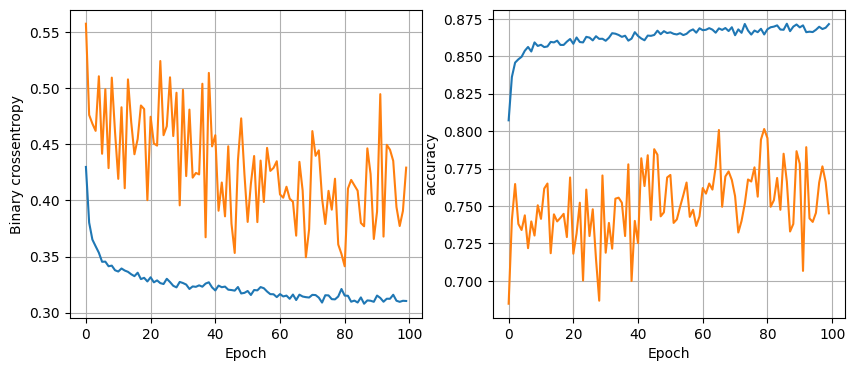

119/119 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8678
32, nodes, dropout 0.2, lr 0.01, batch size 128


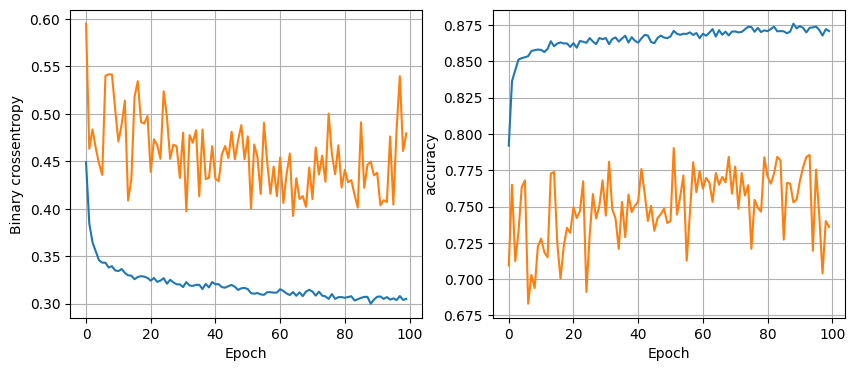

119/119 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.8701
32, nodes, dropout 0.2, lr 0.005, batch size 32


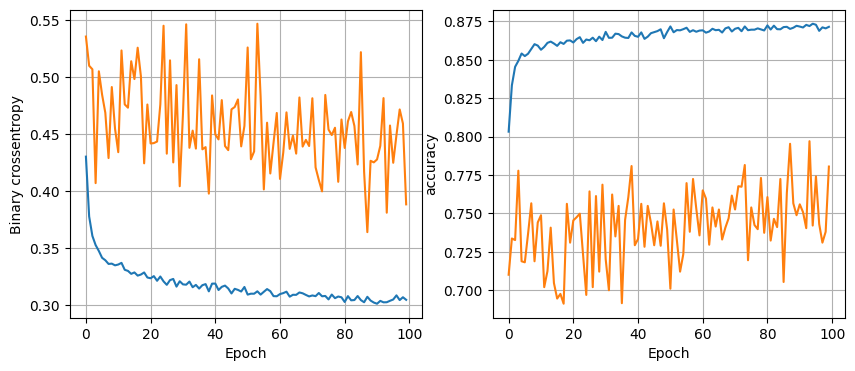

119/119 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8701
32, nodes, dropout 0.2, lr 0.005, batch size 64


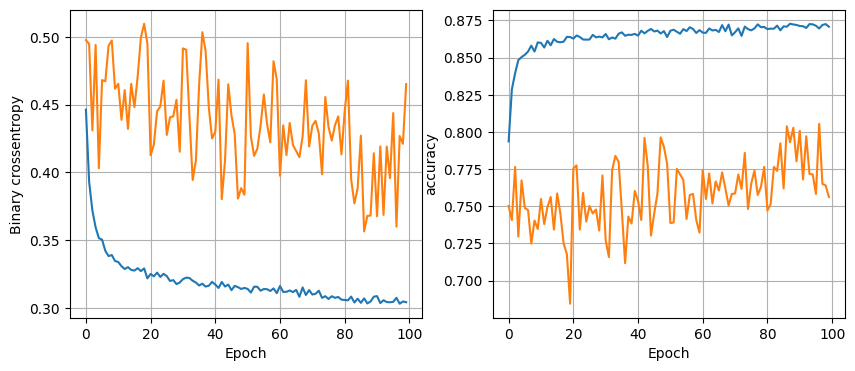

119/119 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.8733
32, nodes, dropout 0.2, lr 0.005, batch size 128


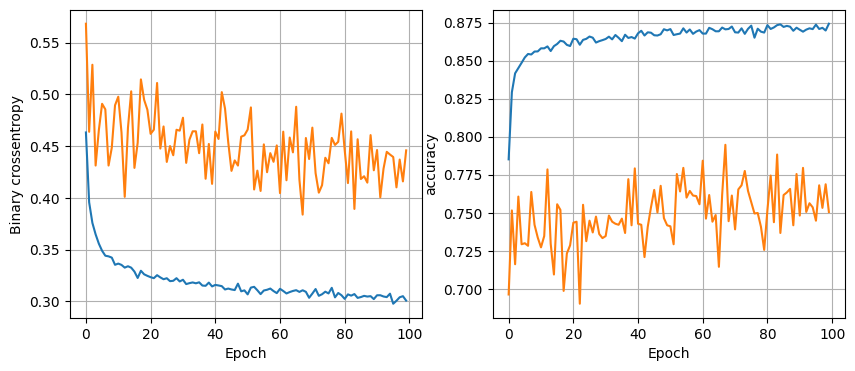

119/119 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8707
32, nodes, dropout 0.2, lr 0.001, batch size 32


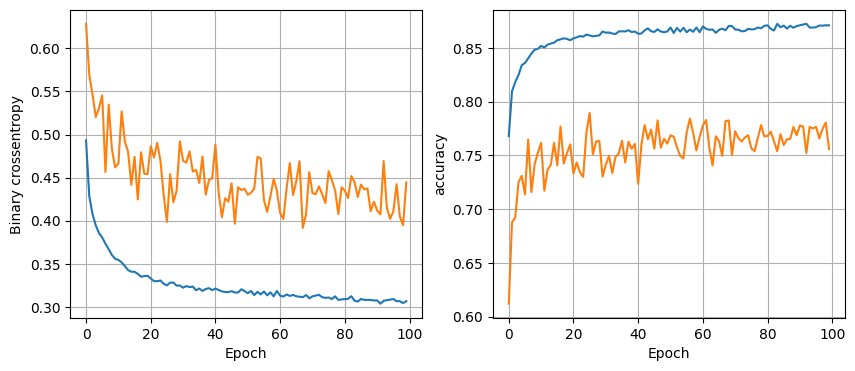

119/119 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8746
32, nodes, dropout 0.2, lr 0.001, batch size 64


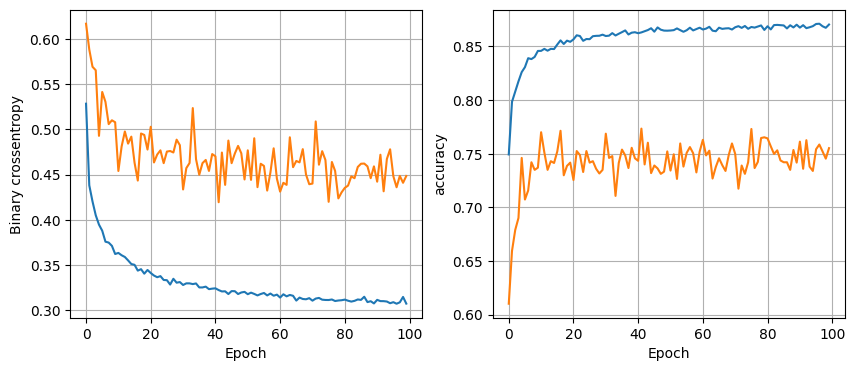

119/119 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8725
32, nodes, dropout 0.2, lr 0.001, batch size 128


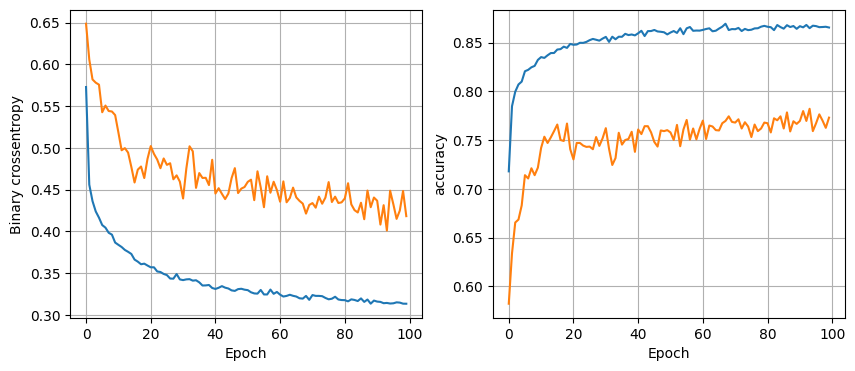

119/119 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8746
64, nodes, dropout 0, lr 0.01, batch size 32


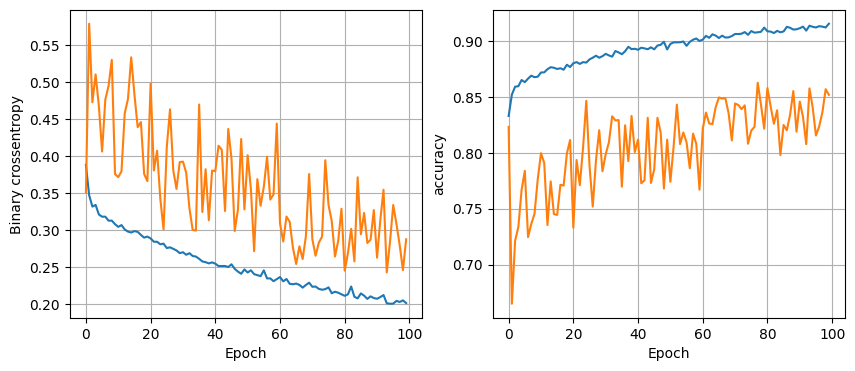

119/119 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.8617
64, nodes, dropout 0, lr 0.01, batch size 64


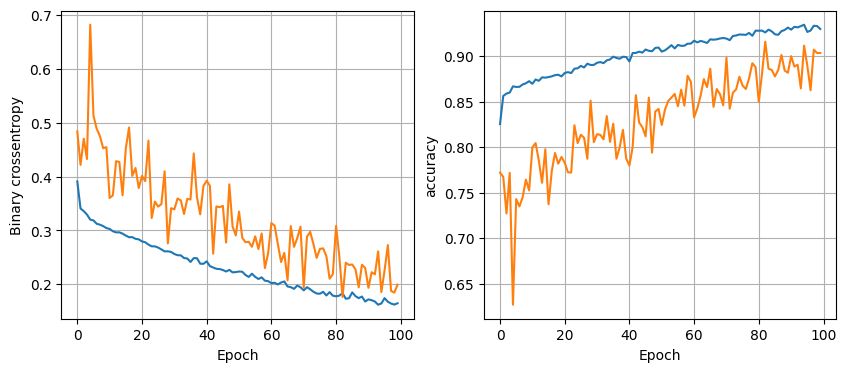

119/119 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.8628
64, nodes, dropout 0, lr 0.01, batch size 128


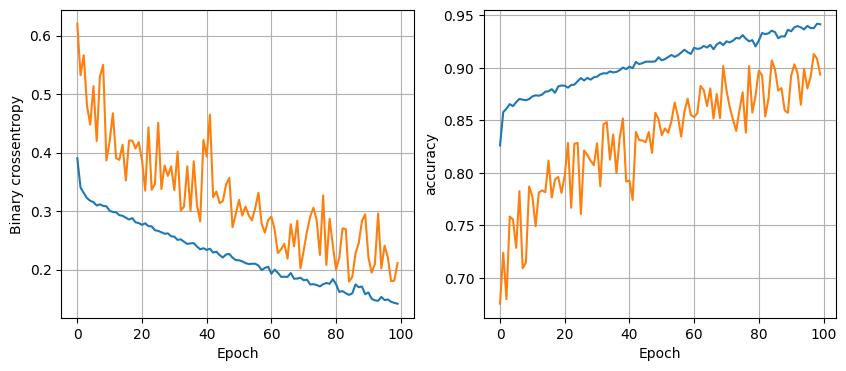

119/119 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.8596
64, nodes, dropout 0, lr 0.005, batch size 32


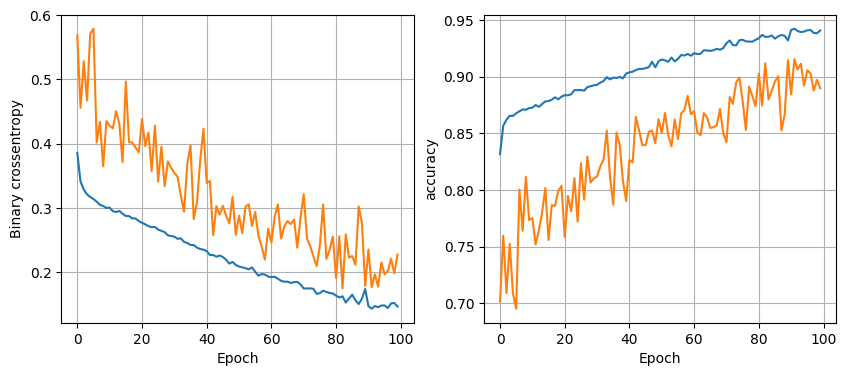

119/119 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.8557
64, nodes, dropout 0, lr 0.005, batch size 64


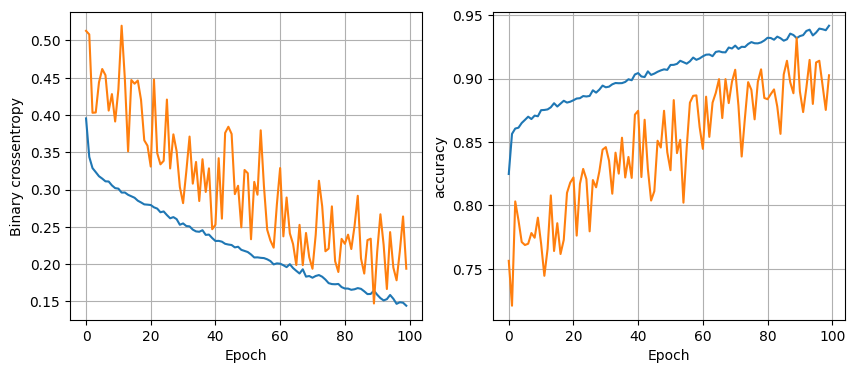

119/119 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.8623
64, nodes, dropout 0, lr 0.005, batch size 128


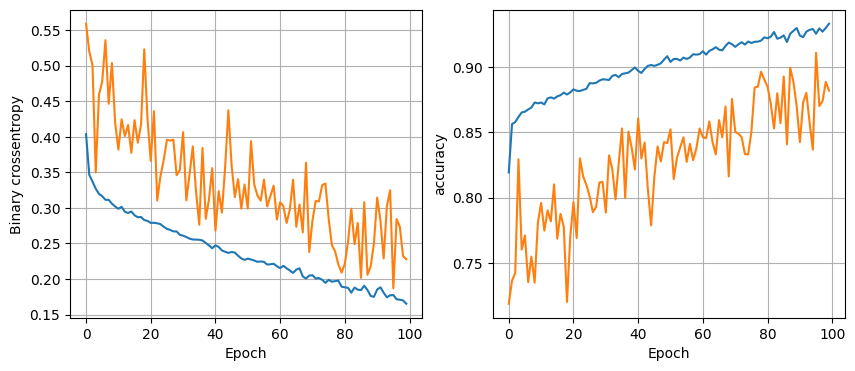

119/119 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.8601
64, nodes, dropout 0, lr 0.001, batch size 32


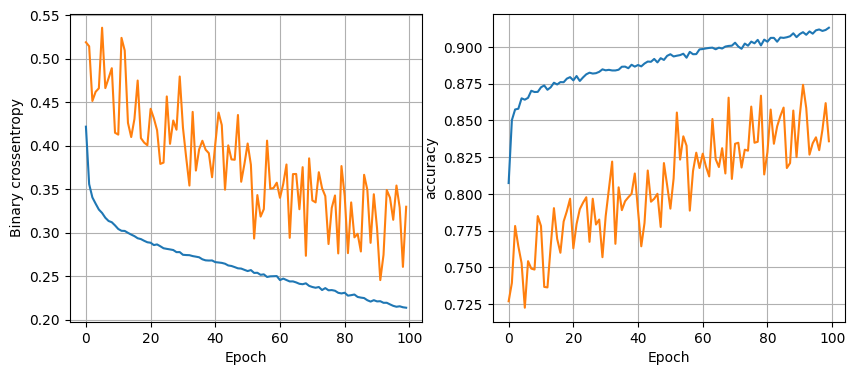

119/119 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8659
64, nodes, dropout 0, lr 0.001, batch size 64


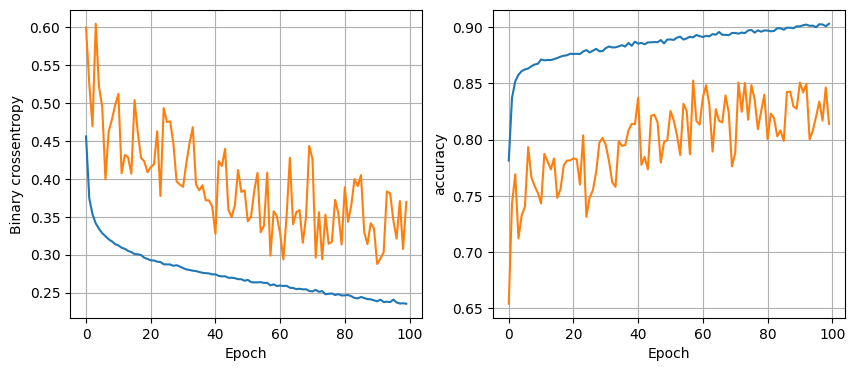

119/119 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8678
64, nodes, dropout 0, lr 0.001, batch size 128


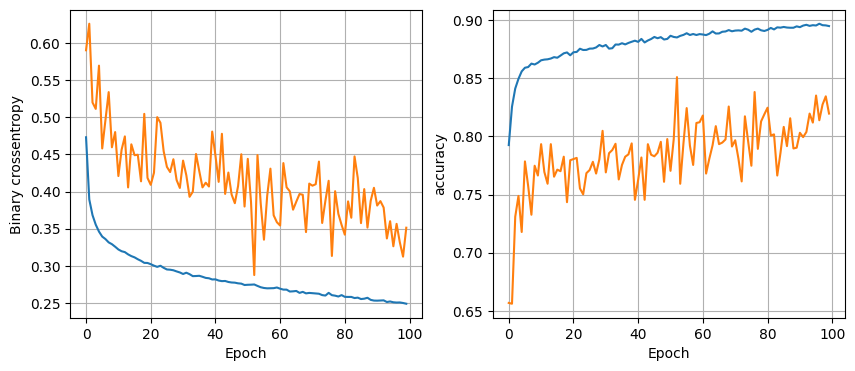

119/119 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8699
64, nodes, dropout 0.2, lr 0.01, batch size 32


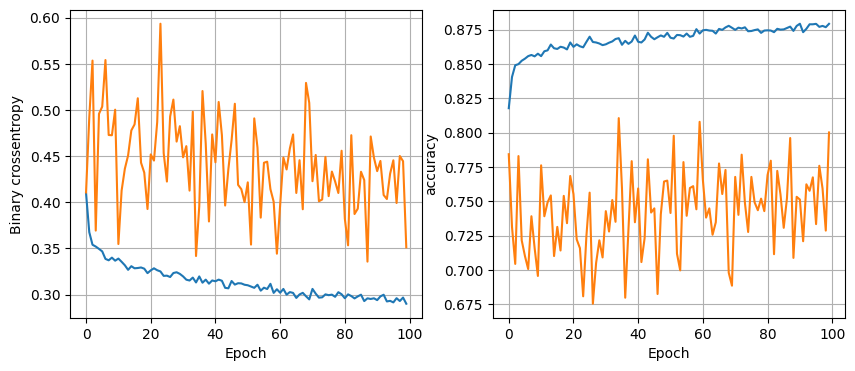

119/119 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8757
64, nodes, dropout 0.2, lr 0.01, batch size 64


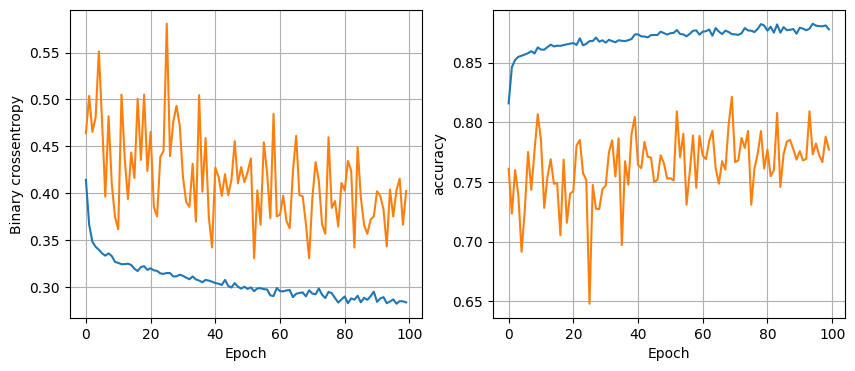

119/119 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8704
64, nodes, dropout 0.2, lr 0.01, batch size 128


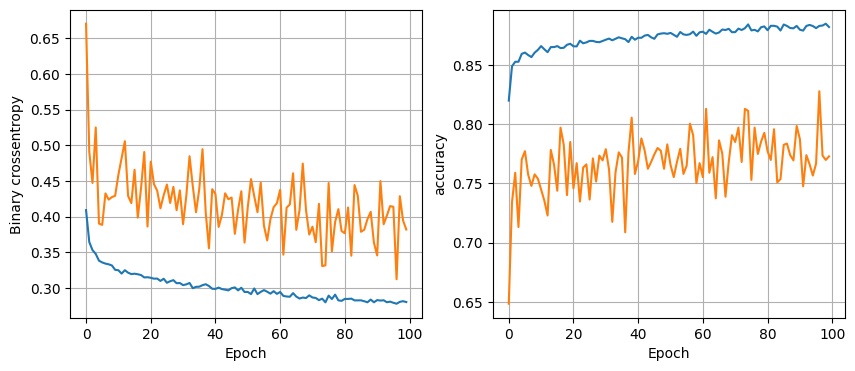

119/119 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8728
64, nodes, dropout 0.2, lr 0.005, batch size 32


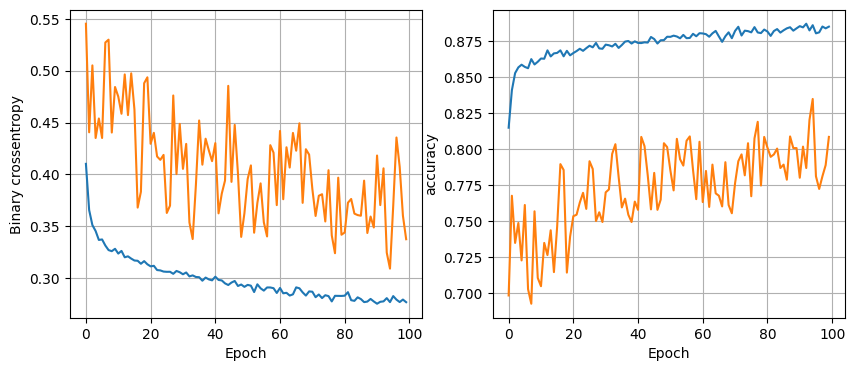

119/119 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.8709
64, nodes, dropout 0.2, lr 0.005, batch size 64


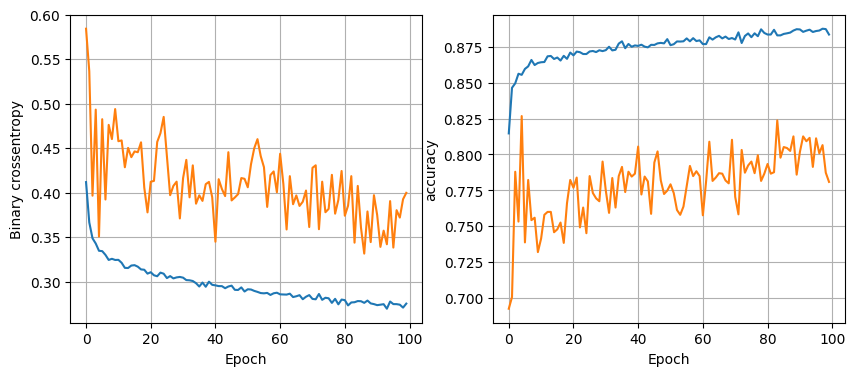

119/119 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8738
64, nodes, dropout 0.2, lr 0.005, batch size 128


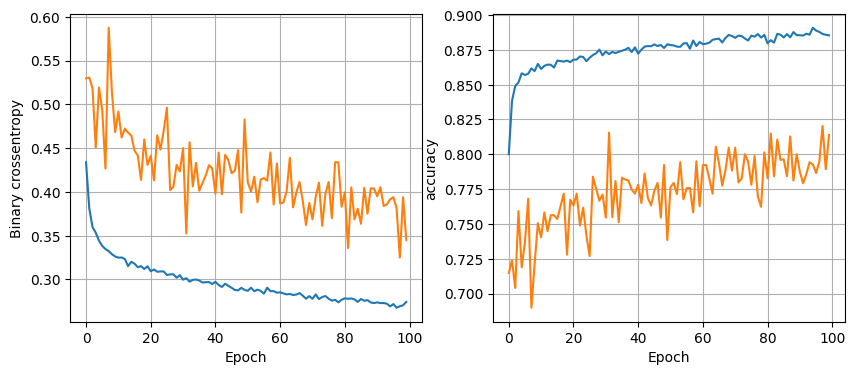

119/119 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8751
64, nodes, dropout 0.2, lr 0.001, batch size 32


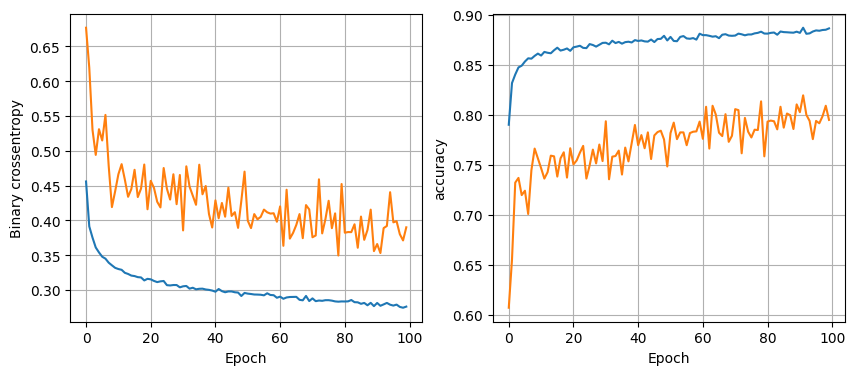

119/119 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8759
64, nodes, dropout 0.2, lr 0.001, batch size 64


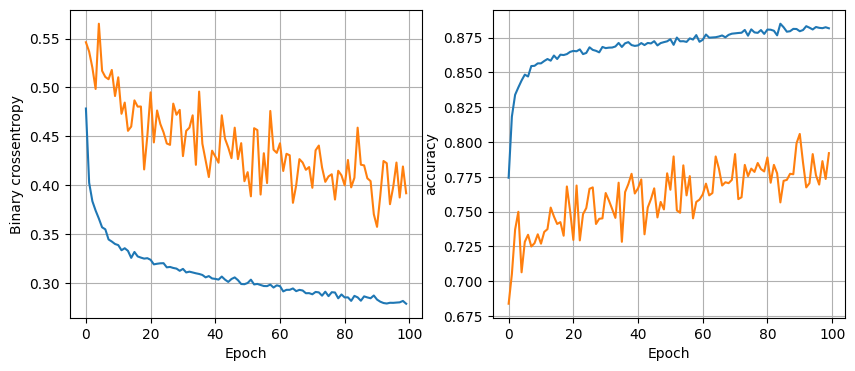

119/119 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8764
64, nodes, dropout 0.2, lr 0.001, batch size 128


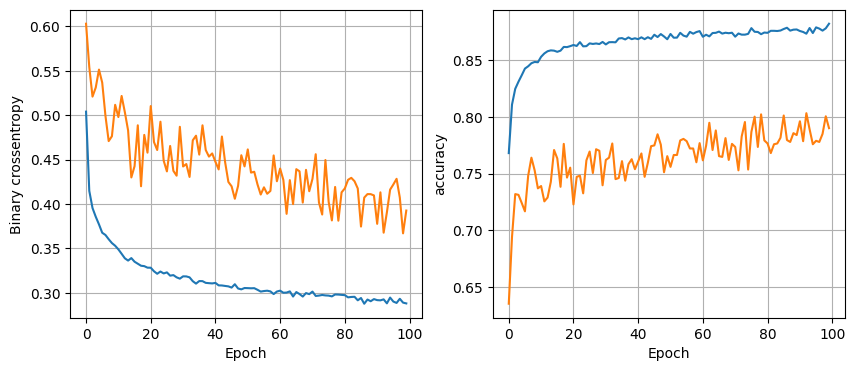

119/119 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8738


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes}, nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))


119/119 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1351
           1       0.88      0.95      0.91      2453

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804



Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)
y_pred

array([0.77251748, 0.52898138, 0.80149628, ..., 0.79611111, 0.71364379,
       0.54364228])

Linear Regression
